In [1]:
import numpy as np
import pandas as pd
import math
from datetime import datetime, timedelta

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn-darkgrid')
palette = plt.get_cmap('Set2')

import os

In [2]:
df_kiva_loans = pd.read_csv("../kiva/kiva_loans.csv")
df_mpi = pd.read_csv("../kiva/kiva_mpi_region_locations.csv")

In [3]:
df_kiva_loans.head(5)

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:12:39+00:00,2013-12-17 08:00:00+00:00,2014-01-02 10:06:32+00:00,12.0,12,NaN,female,irregular,2014-01-01
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:51:08+00:00,2013-12-17 08:00:00+00:00,2014-01-02 09:17:23+00:00,11.0,14,NaN,"female, female",irregular,2014-01-01
2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,334.0,2014-01-01 09:58:07+00:00,2013-12-17 08:00:00+00:00,2014-01-01 16:01:36+00:00,43.0,6,"user_favorite, user_favorite",female,bullet,2014-01-01
3,653063,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variet...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 08:03:11+00:00,2013-12-24 08:00:00+00:00,2014-01-01 13:00:00+00:00,11.0,8,NaN,female,irregular,2014-01-01
4,653084,400.0,400.0,Milk Sales,Food,to purchase one buffalo.,PK,Pakistan,Abdul Hakeem,PKR,245.0,2014-01-01 11:53:19+00:00,2013-12-17 08:00:00+00:00,2014-01-01 19:18:51+00:00,14.0,16,NaN,female,monthly,2014-01-01


## Самостоятельная работа

### В каких странах преобладают мужчины? Группа людей? (п. 2.2.2.)

In [4]:
df_kiva_loans['borrower_genders'] = \
[elem if elem in ['female','male'] else 'group' for elem in df_kiva_loans['borrower_genders']]

In [5]:
countries = df_kiva_loans['country'].value_counts()[df_kiva_loans['country'].value_counts(normalize=True)> 0.005]

In [6]:
df_gender_by_country = \
    df_kiva_loans[df_kiva_loans['country'].isin(countries.index.values)]\
    .groupby(['country', 'borrower_genders'])['borrower_genders']\
    .count()\
    .groupby(level=0).apply(lambda x: 100 * x / x.sum())\
    .unstack('borrower_genders')\
    .fillna(0)\
    .sort_values(by=['male', 'female'])[-20:]

df_gender_by_country = df_gender_by_country[['male', 'female', 'group']]

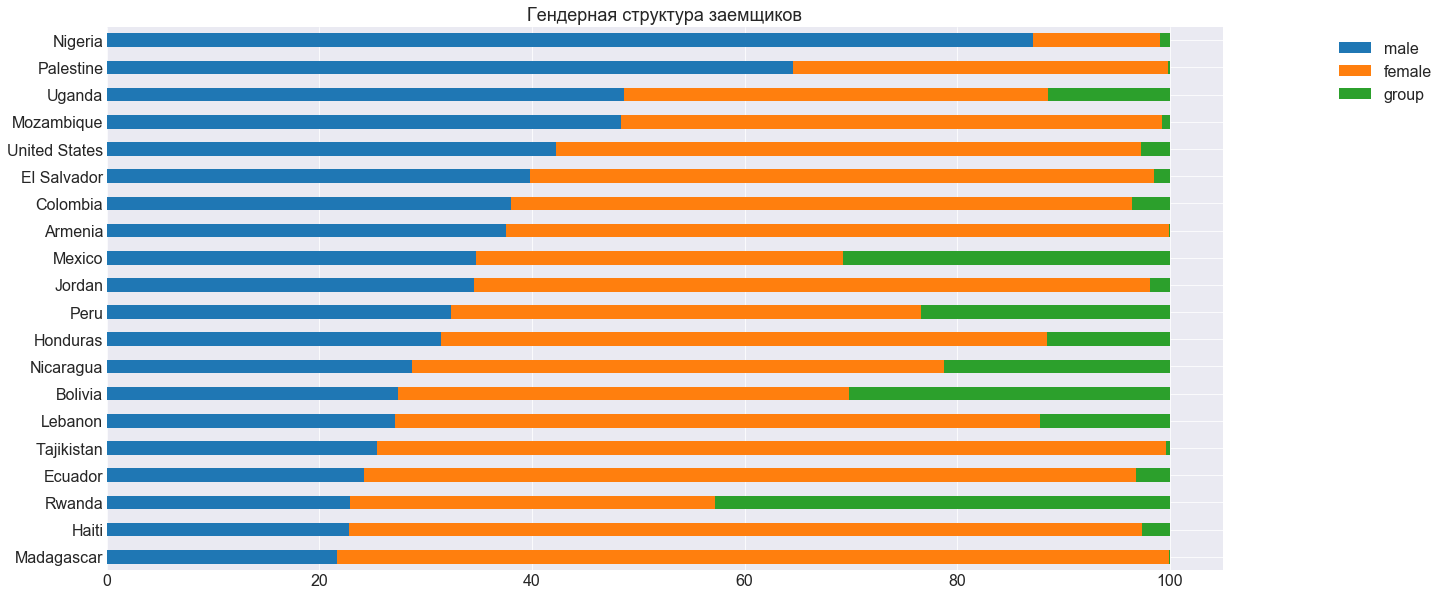

In [7]:
plot = df_gender_by_country.plot.barh(
        figsize=(20,10)
        , fontsize=16
        , stacked=True
        , title='Гендерная структура заемщиков')
plot.title.set_size(18)
plot.legend(loc=1, bbox_to_anchor=(1.2, 1), fontsize=16)
plot.set(ylabel=None, xlabel=None)
plt.show()

Только в двух странах (Нигерия и Палестина) доля мужчин, которые обращаются за займами больше половины. Также в Уганде и Мозамбике их доля составляет около 50%. В остальных странах основными заемщиками они не являются. 

Это можно объяснить тем, что во многих странах для мужчин обычные банковские кредиты являются более доступными, чем для женщин, также они в целом имеют больше возможностей и доходов, а следовательно не обращаются за помощью Kiva.
Однако Kiva должна обратить внимание на эту тенденцию и показать свои преимущества перед обычными банками, чтобы привлечь мужское населения большинства стран. 

In [8]:
df_gender_by_country = \
    df_kiva_loans[df_kiva_loans['country'].isin(countries.index.values)]\
    .groupby(['country', 'borrower_genders'])['borrower_genders']\
    .count()\
    .groupby(level=0).apply(lambda x: 100 * x / x.sum())\
    .unstack('borrower_genders')\
    .fillna(0)\
    .sort_values(by=['group', 'female'])[-20:]

df_gender_by_country = df_gender_by_country[['group', 'female', 'male']]

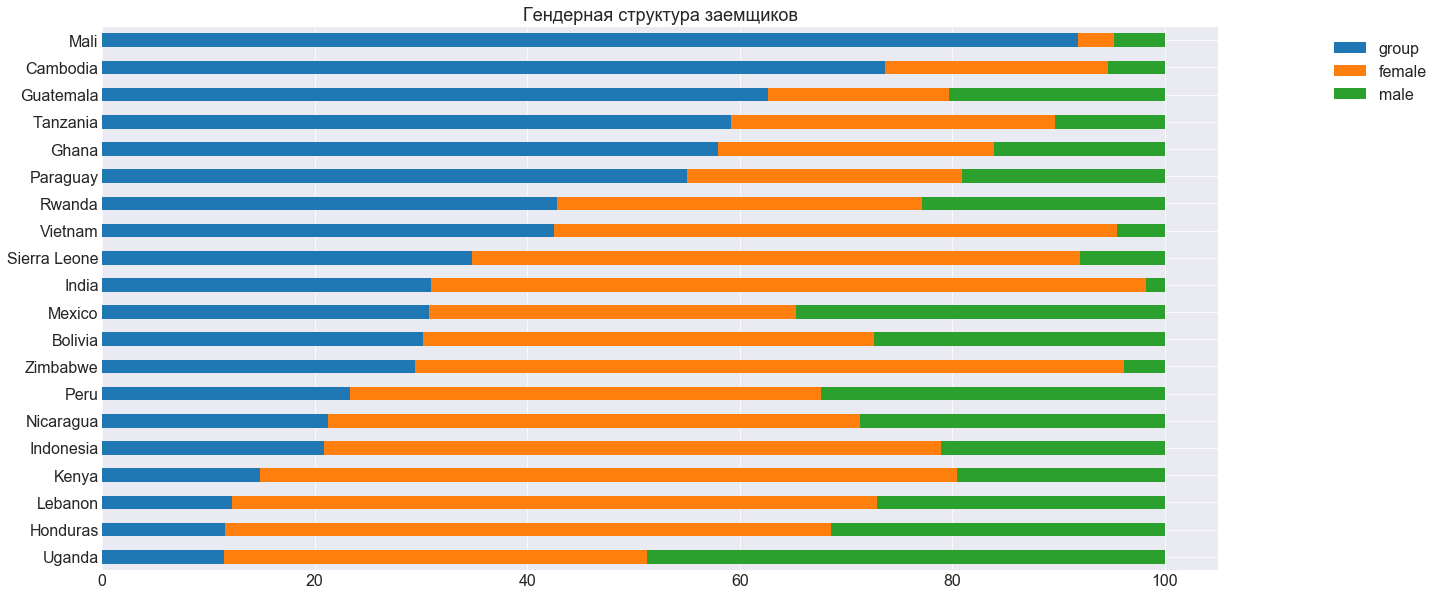

In [9]:
plot = df_gender_by_country.plot.barh(
        figsize=(20,10)
        , fontsize=16
        , stacked=True
        , title='Гендерная структура заемщиков')
plot.title.set_size(18)
plot.legend(loc=1, bbox_to_anchor=(1.2, 1), fontsize=16)
plot.set(ylabel=None, xlabel=None)
plt.show()

Групповые заявки на заем преобладают в большем количестве стран, чем "мужские" заявки. В Мали таких заявок более 90%, также большая доля в Камбоджии, Гватемале, Танзании, Гане, Парагвае. Это может быть связано с двумя факторами. 

Низкое финансовое положение населения приводит к тому, что в одиночку человек не может позволить себе взять заем на какую-либо нужду. Также возможно в этих странах большинство заявок идут на предпринимательскую и сельсохозяйственную деятельность, а не личное потребление и развлечения, что также повышает долю групповых заявок. 

### Изучите несколько займов с очень большими суммами. Что можно сказать о назначении этих заявок? В каких странах они оформлены? Каков гендерный состав заявителей? (п. 2.4.2.)

In [10]:
df_big_loan_amount = df_kiva_loans[df_kiva_loans['loan_amount'] >= 40000]
df_big_loan_amount

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
34196,687045,50000.0,50000.0,Renewable Energy Products,Retail,to buy and sell Barefoot Power's Solar Lightin...,PE,Peru,Arequipa,USD,212.0,2014-03-21 05:25:02+00:00,2014-05-21 07:00:00+00:00,2014-04-18 06:32:55+00:00,14.0,1446,"user_favorite, user_favorite, #Eco-friendly, #...",male,irregular,2014-03-21
43182,695450,50000.0,50000.0,Renewable Energy Products,Retail,To buy and sell Barefoot Power's solar lightin...,KE,Kenya,Nairobi,USD,212.0,2014-04-09 08:25:02+00:00,2014-06-09 07:00:00+00:00,2014-04-19 19:27:30+00:00,16.0,1491,"user_favorite, user_favorite, user_favorite, u...",male,bullet,2014-04-09
53634,706146,50000.0,50000.0,Renewable Energy Products,Retail,To buy and sell Barefoot Power solar lighting.,UG,Uganda,Kampala,USD,212.0,2014-05-06 09:25:03+00:00,2014-07-06 07:00:00+00:00,2014-05-18 15:31:08+00:00,14.0,1581,"#Eco-friendly, #Biz Durable Asset, #Post-disbu...",female,bullet,2014-05-06
70499,722883,100000.0,100000.0,Agriculture,Agriculture,create more than 300 jobs for women and farmer...,HT,Haiti,Les Cayes,USD,315.0,2014-06-10 19:25:02+00:00,2014-09-08 07:00:00+00:00,2014-06-19 20:21:04+00:00,75.0,2986,"user_favorite, user_favorite, user_favorite, u...",female,irregular,2014-06-10
126839,777718,50000.0,50000.0,Agriculture,Agriculture,to buy and plant resin producing pine trees. T...,MX,Mexico,Cherán,USD,376.0,2014-10-01 20:46:15+00:00,2014-08-31 07:00:00+00:00,2014-12-07 17:02:10+00:00,144.0,586,"user_favorite, user_favorite, #Biz Durable Ass...",group,irregular,2014-10-01
148110,798219,41700.0,41700.0,Agriculture,Agriculture,to buy and plant resin producing pine trees. T...,MX,Mexico,Cherán,USD,376.0,2014-11-13 22:12:05+00:00,2014-10-15 07:00:00+00:00,2015-01-17 16:50:07+00:00,118.0,864,"user_favorite, #Sustainable Ag, #Low-profit FP...",group,irregular,2014-11-13
156168,805396,49250.0,49250.0,Goods Distribution,Wholesale,to buy solar lamps that he will sell to cotton...,ML,Mali,Sikasso,XOF,332.0,2014-11-25 15:20:25+00:00,2014-12-30 08:00:00+00:00,2014-12-16 22:13:35+00:00,7.0,1297,"volunteer_pick, volunteer_like, #Inspiring Sto...",male,irregular,2014-11-25
163727,812995,50000.0,50000.0,Agriculture,Agriculture,to fund its growing loan book and further deve...,KE,Kenya,Nairobi,USD,156.0,2014-12-10 16:25:04+00:00,2015-01-01 08:00:00+00:00,2015-01-19 01:22:44+00:00,38.0,1343,"user_favorite, user_favorite, user_favorite, u...",female,bullet,2014-12-10
197210,845211,49950.0,49950.0,Renewable Energy Products,Retail,to import and stock clean energy products such...,HT,Haiti,Port-au-Prince,USD,229.0,2015-02-23 16:11:13+00:00,2015-05-01 07:00:00+00:00,2015-03-17 17:40:11+00:00,26.0,1605,"#Eco-friendly, #Low-profit FP, #Woman Owned Bi...",female,monthly,2015-02-23
210975,859201,50000.0,50000.0,Agriculture,Agriculture,To work with 17 farming cooperatives to proces...,RW,Rwanda,Kigali,USD,319.0,2015-03-20 15:38:45+00:00,2015-03-01 08:00:00+00:00,2015-04-18 13:51:34+00:00,8.0,1302,"user_favorite, user_favorite, user_favorite, #...",male,bullet,2015-03-20


In [11]:
df_big_loan_amount.shape[0]

55

Для анализа займов с большими суммами были отобраны займы большие или равные 40000. Таких заявок из всех 671205 набралось всего 55. 

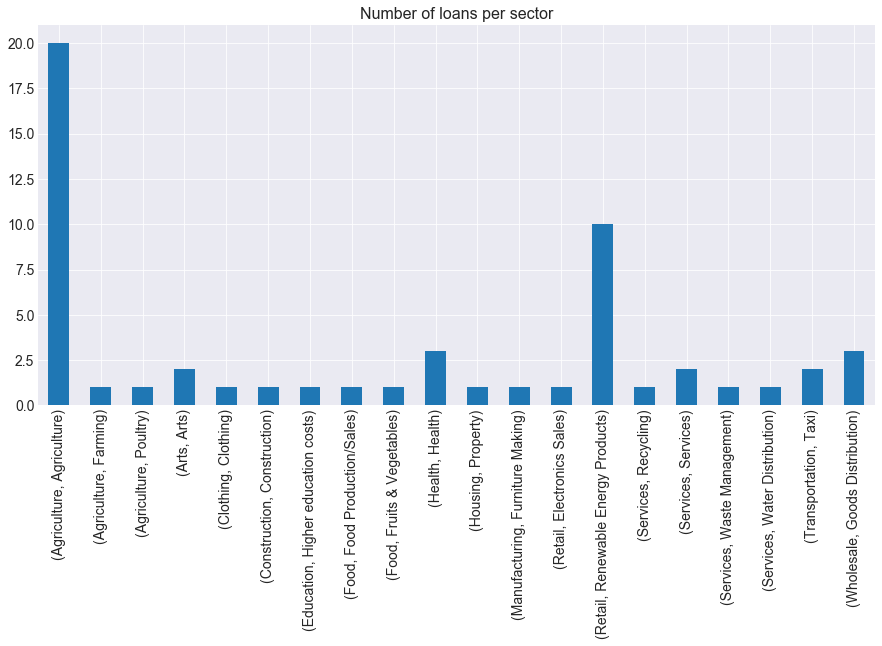

In [12]:
plot = df_big_loan_amount.groupby(['sector', 'activity']).count()['id'].plot(kind='bar', figsize=(15,7), fontsize=14)

plot.set(ylabel=None, xlabel=None)
plt.title('Number of loans per sector', fontsize = 16)
plt.show()

Основная часть заемов с большими суммами были запрошены на сельскохозяйственную деятельность или покупку возобновляемых источников энергии. Для возобновляемых источников энергии - это в основном покупка солнечных батарей. В сельскохозяйственном секторе - покупка большого количества сырья у локальных фермеров. 

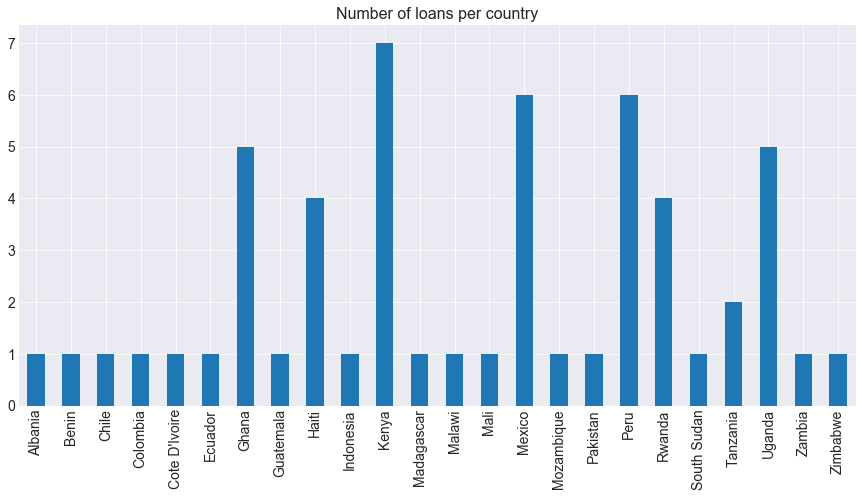

In [13]:
plot = df_big_loan_amount.groupby(['country']).count()['id'].plot(kind='bar', figsize=(15,7), fontsize=14)

plot.set(ylabel=None, xlabel=None)
plt.title('Number of loans per country', fontsize = 16)
plt.show()

Страны с большим количеством крупных заемов: Гана, Гаити, Кения, Мексика, Перу, Руанда и Уганда, то есть страны Южной Америки и Африки. 

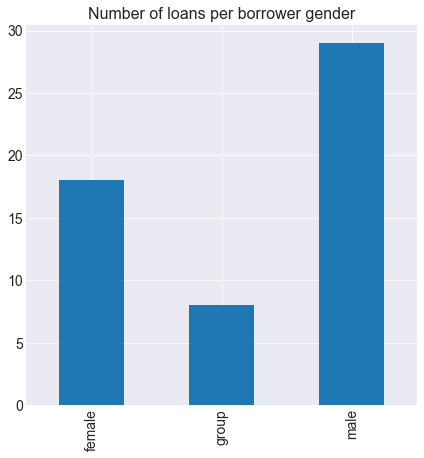

In [14]:
plot = df_big_loan_amount.groupby(['borrower_genders']).count()['id'].plot(kind='bar', figsize=(7,7), fontsize=14)

plot.set(ylabel=None, xlabel=None)
plt.title('Number of loans per borrower gender', fontsize = 16)
plt.show()

Около половины всех заявок на заемы с большими суммами оставили мужчины. Далее идут женщины и только после них, всего 9 заявок были групповыми. Это достаточно неожиданно, так как можно было бы предпложожить, что большая группа людей будет оставлять заявки на большую сумму денег, чем один человек. Это может быть связано с тем, что несмотря на то, что заявитель указан один, данный заем нужен ему для помощи сразу большому количеству людей, как в случае с сельскохозяйственным сегментом, где большинство заемов направлены на помощь локальным фермерам. Таким образом, в заявке указывается один заемщик, хотя на самом деле большая сумма денег пойдет на помощь сотням других людей.

### Попробуйте найти связь между странами (регионами), полом заёмщика и суммой заявки. Какие выводы можно сделать из этих данных? (п. 2.4.3.)

In [15]:
df_mpi_grouped = df_mpi\
    .groupby(['ISO', 'country', 'world_region'])['MPI']\
    .mean()\
    .fillna(0)\
    .reset_index()

df_kiva_loans = df_kiva_loans.merge(df_mpi_grouped, how='left', on='country')
regions = df_kiva_loans['world_region'].value_counts()
regions_list = regions.index.to_list()

In [16]:
dev = (df_kiva_loans['loan_amount']-df_kiva_loans['loan_amount'].mean()).abs()

std = df_kiva_loans['loan_amount'].std()

df_kiva_loans_trimmed = df_kiva_loans[~(dev>3*std)]

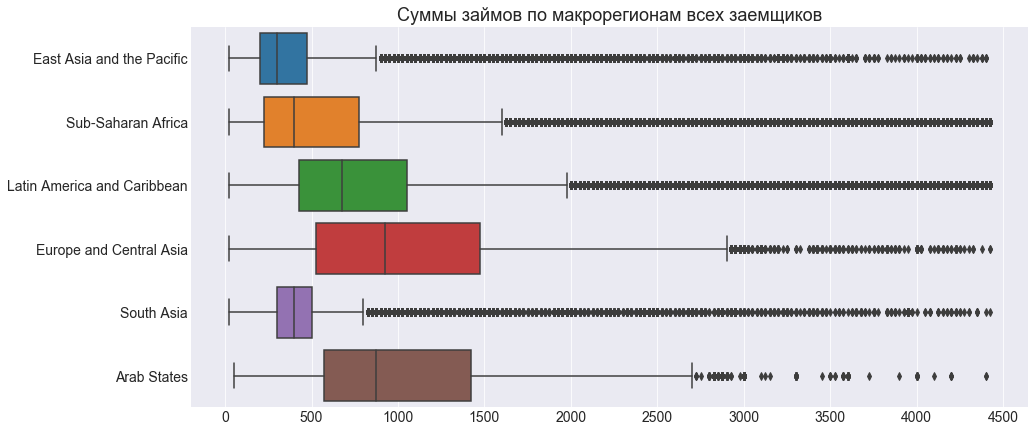

In [17]:
#Все заемщики
plt.figure(figsize=(15,7))
plt.title("Суммы займов по макрорегионам всех заемщиков", fontsize=18)
plt.xticks(np.arange(0, max(df_kiva_loans['loan_amount']+1), 500))
plt.tick_params(labelsize=14)

sns.boxplot(x='loan_amount', y="world_region", order=regions_list, data=df_kiva_loans_trimmed)\
    .set(ylabel=None, xlabel=None)
plt.show()

In [18]:
df_kiva_loans_trimmed_male = df_kiva_loans_trimmed[df_kiva_loans_trimmed['borrower_genders'] == 'male']

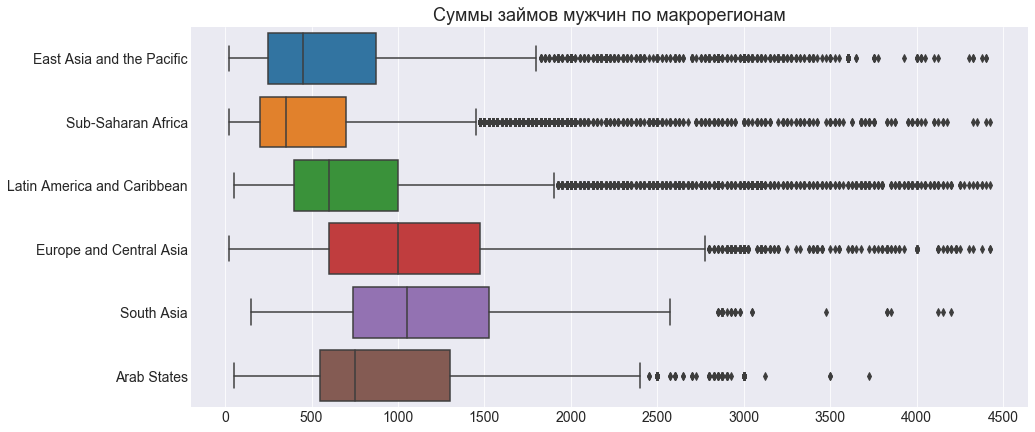

In [19]:
#Заемщики мужского пола
plt.figure(figsize=(15,7))
plt.title("Суммы займов мужчин по макрорегионам", fontsize=18)
plt.xticks(np.arange(0, max(df_kiva_loans['loan_amount']+1), 500))
plt.tick_params(labelsize=14)

sns.boxplot(x='loan_amount', y="world_region", order=regions_list, data=df_kiva_loans_trimmed_male)\
    .set(ylabel=None, xlabel=None)
plt.show()

Различия между заемами у мужчин и общими данными существуют. Самые заметные изменения в регионах "Восточная Азия и Океания" и "Южная Азия". 

В первом регионе увеличилось медианное значение, а также стало значительно больше значений, которые входят в верхний перцентиль, а также суммы, которые находятся за пределами верхнего квартиля, но не являются выбросом. Это означает, что в данном регионе мужчины в среднем берут займы с более высокими суммами, чем все заемщики. 

В Южной Азии аналогичная тенденция, однако еще более выраженная. Сильно отличается как медианное значение, так и показатель верхнего квартиля. 

В трех регионах (Африка, Латинская Америка и Карибы, Европа и Центральная Азия) показатели в целом одинаковы с показателями всех заемщиков.

В Арабском регионе медиана незначительно сдвинута в меньшую сторону, однако 25 и 75 перцентили также сопоставимы с 
данными всех заемщиков. 

In [20]:
df_kiva_loans_trimmed_female = df_kiva_loans_trimmed[df_kiva_loans_trimmed['borrower_genders'] == 'female']

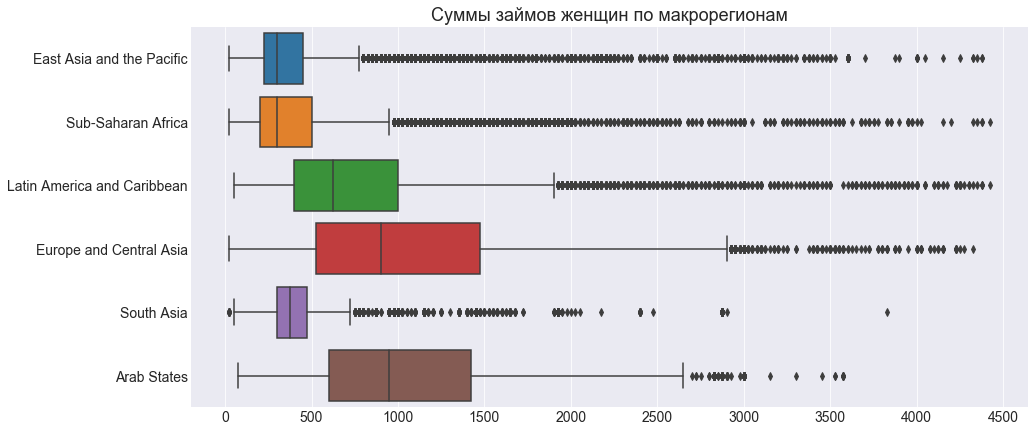

In [21]:
#Заемщики женского пола
plt.figure(figsize=(15,7))
plt.title("Суммы займов женщин по макрорегионам", fontsize=18)
plt.xticks(np.arange(0, max(df_kiva_loans['loan_amount']+1), 500))
plt.tick_params(labelsize=14)

sns.boxplot(x='loan_amount', y="world_region", order=regions_list, data=df_kiva_loans_trimmed_female)\
    .set(ylabel=None, xlabel=None)
plt.show()

Структура заемов среди женщин практически не отличается от всех заемщиков в регионах Латинской Америки и Карибах, Арабском регионе и Европе и Центральной Азии. В этих странах показатели женщин также сравнимы с показателями мужчин. 

В Восточной Азии и Океании медианные значения у женщин ниже, чем у мужчин и всех заемщиков.

В Африке медианное значение незначительно меньше, чем у мужчин и всех заемщиков, однако 75-перцентиль гораздо меньше. 

В Южной Азии наблюдается самое большое отличие от заемщиков-мужчин. Там медианное значения и перцентили находятся значительно ниже, чем в структуре заемщиков-мужчин. 75-перцентиль у женщин даже не доходит до 25-перцентиля у мужчин.

In [22]:
df_kiva_loans_trimmed_group = df_kiva_loans_trimmed[df_kiva_loans_trimmed['borrower_genders'] == 'group']

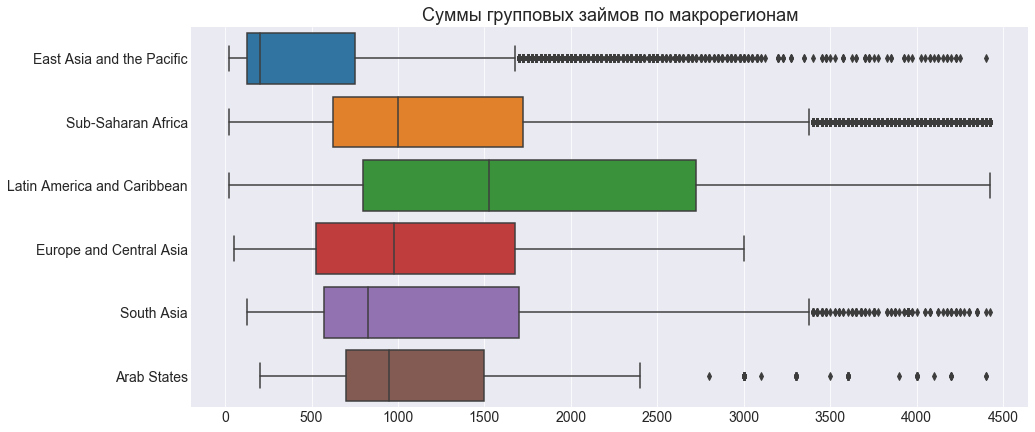

In [23]:
#Группа заемщиков
plt.figure(figsize=(15,7))
plt.title("Суммы групповых займов по макрорегионам", fontsize=18)
plt.xticks(np.arange(0, max(df_kiva_loans['loan_amount']+1), 500))
plt.tick_params(labelsize=14)

sns.boxplot(x='loan_amount', y="world_region", order=regions_list, data=df_kiva_loans_trimmed_group)\
    .set(ylabel=None, xlabel=None)
plt.show()

Наиболее значительная разница по сравнению с общем структурой заемов у групповых заявок.

Только в Арабском регионе средние суммы заявок сравнимы с общими показателями и показателями у женщин и мужчин. 

Во всех остальных регионах занчительно увеличивается сумма 75-ого квартиля заявок, а также максимальное значение до выбросов. 

**Общие выводы:**

Единственный относительно однородный регион - Арабские государства. Там сумма заявок практически не зависит от пола заемщика.

В странах Латинской Америки и Карибов, а также Европы и Центральной Азии сумма заемов не зависит от пола заемщика, сумма увеличивается только при групповых заявках. 

В Африке и Восточной Азии и Океании медианное значение заемов у женщин не сильно отличается от мужчин, однако 75-перцентиль расположен гораздо ниже, что означает то, что женщины берут большее количество заемов на маленькие суммы. Следовательно, мужчины как и женщины склонны брать заемы на незначительные нужды с малыми суммами, однако при этом и на более значительные траты, которые уже могут относится к их профессиональной деятельности, в отличие от большинства женщин.

Наибольшое неравенство видно в Южной Азии. Там женщины берут большое количество маленьких заемов (большинство до 500 долларов), в то время как основная сумма заемов у мужчин находится в диапазоне от 750 до 1500 долларов. Женщины бурет заемы для первоочередных нужд, которые могут покрыть небольшие суммы, в то время как мужчины более склонны к средним и крупным заемам, которые могут быть использованы и для профессиональной деятельности. 

## Домашнее задание

### Зависимость пола заемщика от региона планеты, сектора экономики

In [79]:
df_kiva_loans.head(5)

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,...,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date,ISO,world_region,MPI
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,...,2014-01-02 10:06:32+00:00,12.0,12,NaN,female,irregular,2014-01-01,PAK,South Asia,0.233167
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,...,2014-01-02 09:17:23+00:00,11.0,14,NaN,group,irregular,2014-01-01,PAK,South Asia,0.233167
2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,...,2014-01-01 16:01:36+00:00,43.0,6,"user_favorite, user_favorite",female,bullet,2014-01-01,IND,South Asia,0.000000
3,653063,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variet...,PK,Pakistan,Lahore,PKR,...,2014-01-01 13:00:00+00:00,11.0,8,NaN,female,irregular,2014-01-01,PAK,South Asia,0.233167
4,653084,400.0,400.0,Milk Sales,Food,to purchase one buffalo.,PK,Pakistan,Abdul Hakeem,PKR,...,2014-01-01 19:18:51+00:00,14.0,16,NaN,female,monthly,2014-01-01,PAK,South Asia,0.233167


In [36]:
df_gender_by_region = df_kiva_loans.groupby(['world_region', 'borrower_genders'])['borrower_genders'].count()\
    .groupby(level=0).apply(lambda x: 100 * x / x.sum())\
    .unstack('borrower_genders')\
    .fillna(0)\
    .sort_values(by=['female', 'male'])[-20:]


df_gender_by_region = df_gender_by_region[['female', 'male', 'group']]

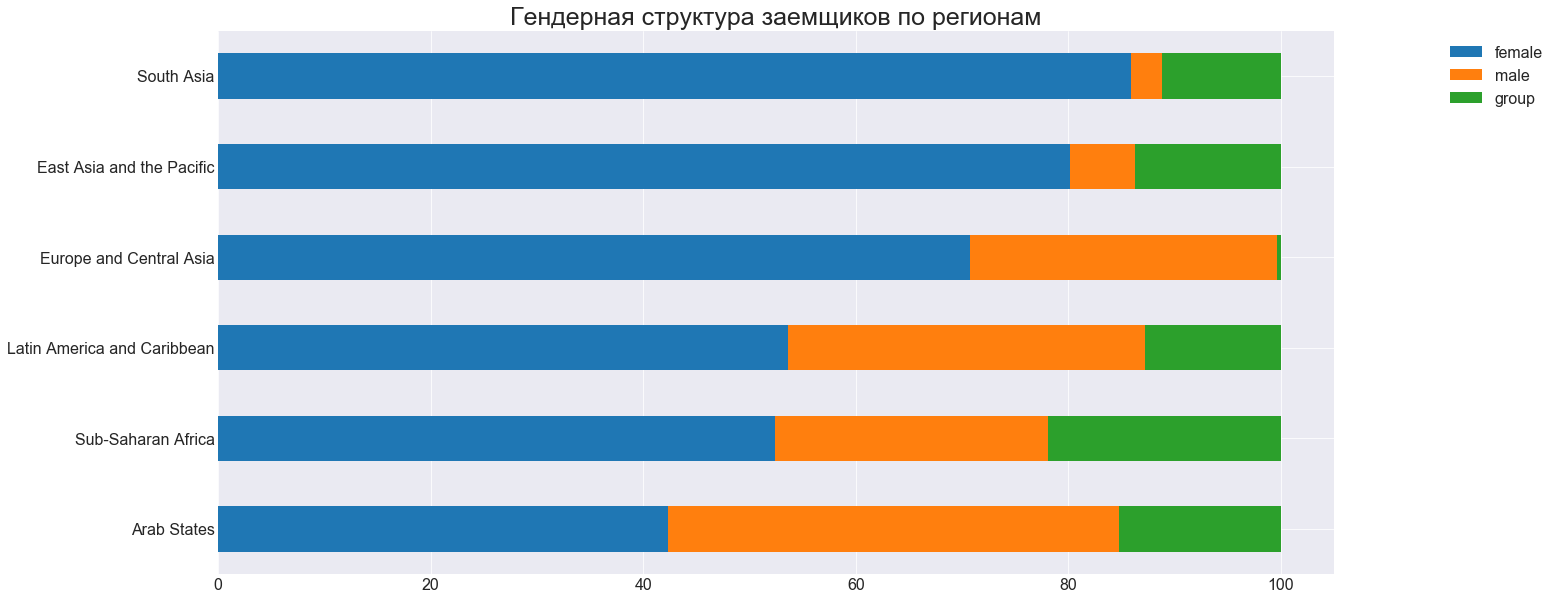

In [40]:
plot = df_gender_by_region.plot.barh(
        figsize=(20,10)
        , fontsize=16
        , stacked=True
        , title='Гендерная структура заемщиков по регионам')
plot.title.set_size(25)
plot.legend(loc=1, bbox_to_anchor=(1.2, 1), fontsize=16)
plot.set(ylabel=None, xlabel=None)
plt.show()

Гендерная структура займов в Kiva зависит от географических регионов. 

В Южной Азии подавляющее большинство заемов приходится на женщин. Схожая ситуация в Восточной Азии и Океании. Возможно это объясняется меньшим доступом женщин к обычным кредитам, а также их более низкому социальному положению. В этих регионах руководство Kiva должно обратить внимание и продвигать свои услуги среди мужского населения для распространения своего присутствия. 

В Европе и Центральной Азии около 70% также приходится на женщин, однако в странах этого региона крайне мала доля групповых заявок (около 1%), что скорее всего означает низкую осведомленность жителей о такой возможности (так как в других регионах таких заявок гораздо больше). В связи с эти руководство Kiva должно обратить внимание на распространение информации о преимуществах групповых заявок в данном регионе.

В Латинской Америке и Африке заявки женщин составляют более 50%, однако существует и большое количество мужских заявок, а также групповых. Тем не менее стоит отметить, что во всех рассмотренных регионах женщины оставляют больше заявок, чем мужчины, что говорит о том, что зачастую они обладают меньшим благосостоянием или ограниченным доступом к традиционным финансовым инструментам. 

Относительное равенство наблюдается лишь в Арабских странах, где доля "женских" и "мужских" заявок примерно одинакова. Также чуть более 15% приходится на групповые заявки. 

In [48]:
df_gender_by_sector = df_kiva_loans.groupby(['sector', 'borrower_genders'])['borrower_genders'].count()\
    .groupby(level=0).apply(lambda x: 100 * x / x.sum())\
    .unstack('borrower_genders')\
    .fillna(0)\
    .sort_values(by=['female', 'male'])[-20:]


df_gender_by_sector = df_gender_by_sector[['female', 'male', 'group']]

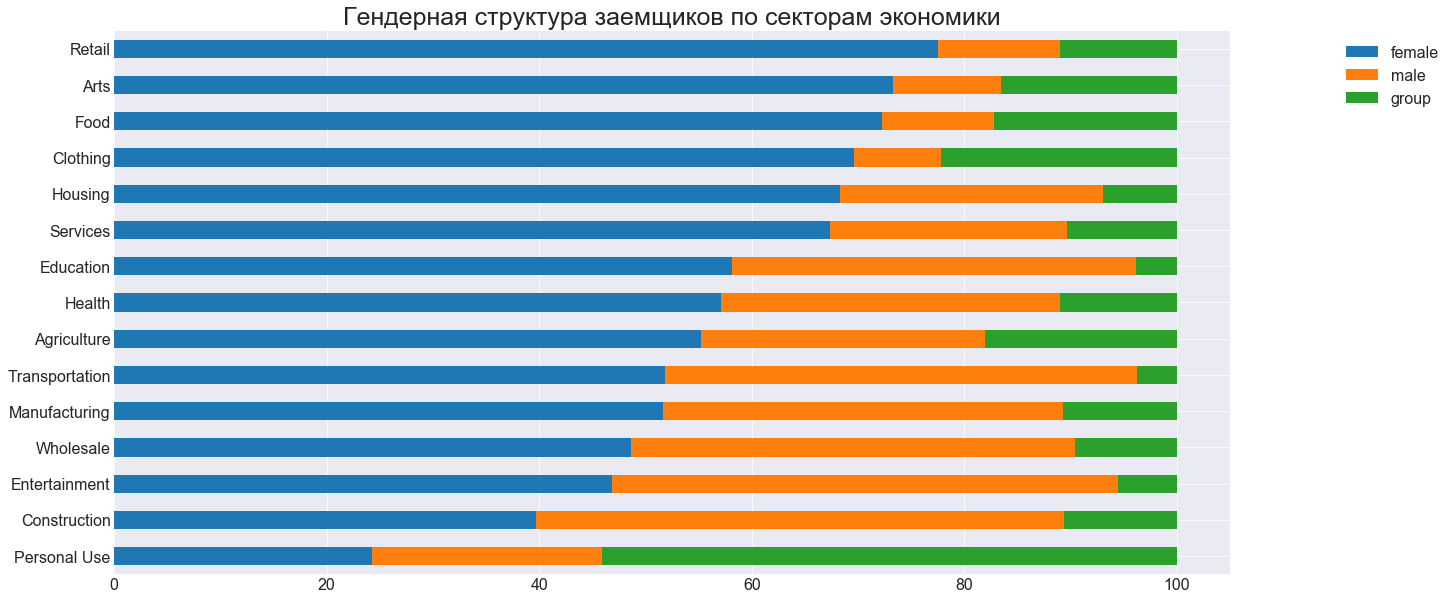

In [49]:
plot = df_gender_by_sector.plot.barh(
        figsize=(20,10)
        , fontsize=16
        , stacked=True
        , title='Гендерная структура заемщиков по секторам экономики')
plot.title.set_size(25)
plot.legend(loc=1, bbox_to_anchor=(1.2, 1), fontsize=16)
plot.set(ylabel=None, xlabel=None)
plt.show()

Практически во всех секторах экономики преобладают заявки на заемы от женщин. Схожие мужские показатели можно наблюдать только в традиционно мужских секторах, таких как транспорт, производство, оптовая торговля. 

Большее количество заявок от мужчин присутствует лишь в секторе строительства.

В секторах развлечение и личные нужды доля заемов от мужчин и женщин примерно одинаковая. Интересно, что в секторе личные нужды преобладают групповые заявки. 

### Влияние такого атрибута займа, как Количество кредиторов (lender_count), на суммы и сроки займов.

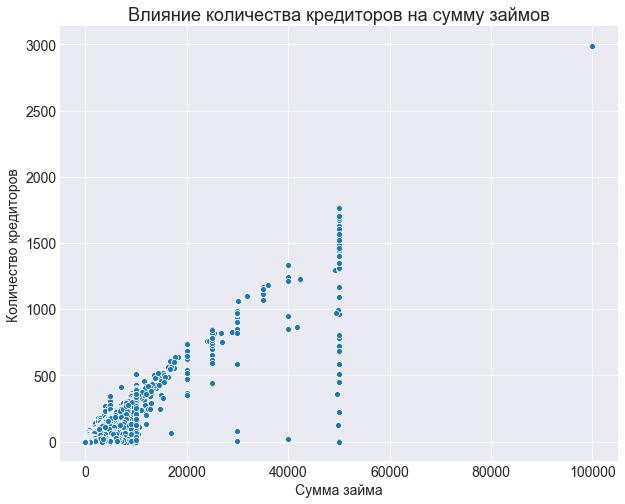

In [72]:
plt.figure(figsize=(10,8))
plt.title("Влияние количества кредиторов на сумму займов", fontsize=18)
plt.tick_params(labelsize=14)
sns.scatterplot(x="loan_amount", y="lender_count", data=df_kiva_loans)\
    .set(xlabel="Сумма займа", ylabel = "Количество кредиторов")

plt.show()

В целом наблюдается рост количества кредиторов на займы до 50000 долларов. Займы до 10000 спонсируются до 500 кредиторами, наблюдается постепенный рост количества кредиторов для части сумм, при этом суммы до 10000 долларов спонсируются как единичными кредиторами, так и большими группами до 500 человек.

Далее в займах до 50000 долларов количество кредиторов растет по мере увеличения суммы займа. Практически отсутствуют единичные кредиторы. 

На отметке в 50000 долларов видна интересная тенденция. Если до этого количество кредиторов всегда росло и при этом сокращалось количество займов с небольшим количеством кредиторов, то на отметке в 50000 долларов представлен почти все вариации количества кредиторов от единичных кредиторов до заявок, которые финансировались почти 2000 людей.

Самая большая заявка в 100000 долларов была проспонсирована наибольшим количеством кредиторов - 3000

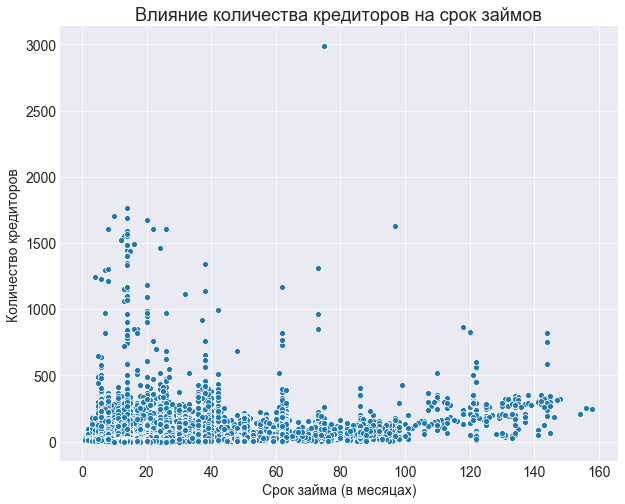

In [74]:
plt.figure(figsize=(10,8))
plt.title("Влияние количества кредиторов на срок займов", fontsize=18)
plt.tick_params(labelsize=14)
sns.scatterplot(x="term_in_months", y="lender_count", data=df_kiva_loans)\
    .set(xlabel="Срок займа (в месяцах)", ylabel = "Количество кредиторов")

plt.show()

Из графика видно, что количество кредиторов практически не влияет на срок займов. До 100 месяцев разницы в данных практически нет. После 100 месяцев можно выделить снижение количество небольшого числа кредиторов, хотя займы с небольшим числом кредиторов все еще присутствуют.

### Влияние показателя MPI (многомерный индекс бедности) в разных странах на суммы займов и сроки погашения.

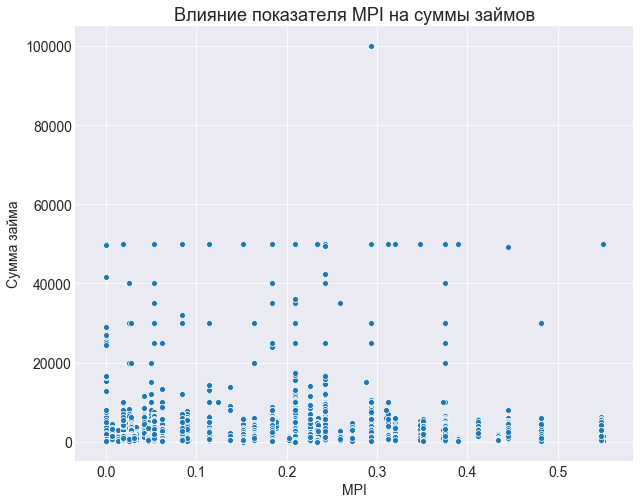

In [77]:
plt.figure(figsize=(10,8))
plt.title("Влияние показателя MPI на суммы займов", fontsize=18)
plt.tick_params(labelsize=14)
sns.scatterplot(x="MPI", y="loan_amount", data=df_kiva_loans)\
    .set(xlabel="MPI", ylabel = "Сумма займа")

plt.show()

Показатель MPI не сильно влияет на суммы займов. До MPI равным 0.4 данные практически одинаковы. Далее можно выделить, что у стран с показателем MPI больше 0.4 практически отсутствуют заемы больше 10000 долларов, которых достаточно много у стран с MPI менее 0.4. Таким образом, люди в очень бедных странах склонны к небольшим заемам на самые первоочередные нужды, в то время как страны с чуть лучшем положением (MPI < 0.4) берут большее количество больших кредитов. 

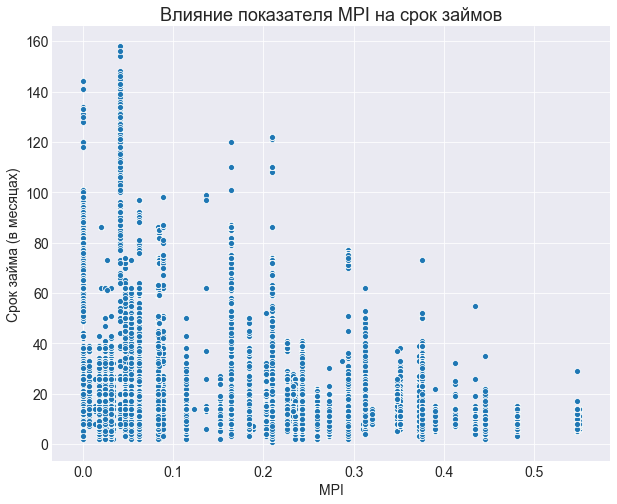

In [80]:
plt.figure(figsize=(10,8))
plt.title("Влияние показателя MPI на срок займов", fontsize=18)
plt.tick_params(labelsize=14)
sns.scatterplot(x="MPI", y="term_in_months", data=df_kiva_loans)\
    .set(xlabel="MPI", ylabel = "Срок займа (в месяцах)")

plt.show()

Можно выделить связь между показателем MPI и сроком займа. В странах с лучшим показателем бедности займы в целом берутся на большее количество месяцев, а вернее существуют займы, которые берутся на больший срок по сравнению с займами в более бедных странах. Это связано скорее с уверенностью заемщиков в том, что даже через большое время они смогут вернуть займ, так как ситуация в стране на это скорее всего не повлияет, в то время как в бедных странах таких гарантий меньше. 

Такую тенденцию нельзя объяснить суммой кредита, так как на предыдущем графике было видно, что MPI не сильно влияет на сумму кредита. 

### Зависимости таких метрик, как «Сумма займа», «Срок займа», «Время финансирования заявки», «Ежемесячный платёж», в разрезе макрорегионов.

In [95]:


df_region_median = df_loans_dates_trimmed.groupby(['world_region'])\
    .agg({'loan_amount' : 'median', 'time_funding' : 'median', 'term_in_months' : 'median'})\
    .reset_index()

df_region_median['monthly_repayment'] = df_region_median['loan_amount'] / df_region_median['term_in_months']

df_region_median

,world_region,loan_amount,time_funding,term_in_months,monthly_repayment
0,Arab States,650.0,3.776863,14.0,46.428571
1,East Asia and the Pacific,575.0,9.963727,10.0,57.500000
2,Europe and Central Asia,1100.0,27.837870,66.0,16.666667
3,Latin America and Caribbean,750.0,18.583750,13.0,57.692308
4,South Asia,1112.5,9.744039,21.0,52.976190
5,Sub-Saharan Africa,300.0,11.614763,13.0,23.076923


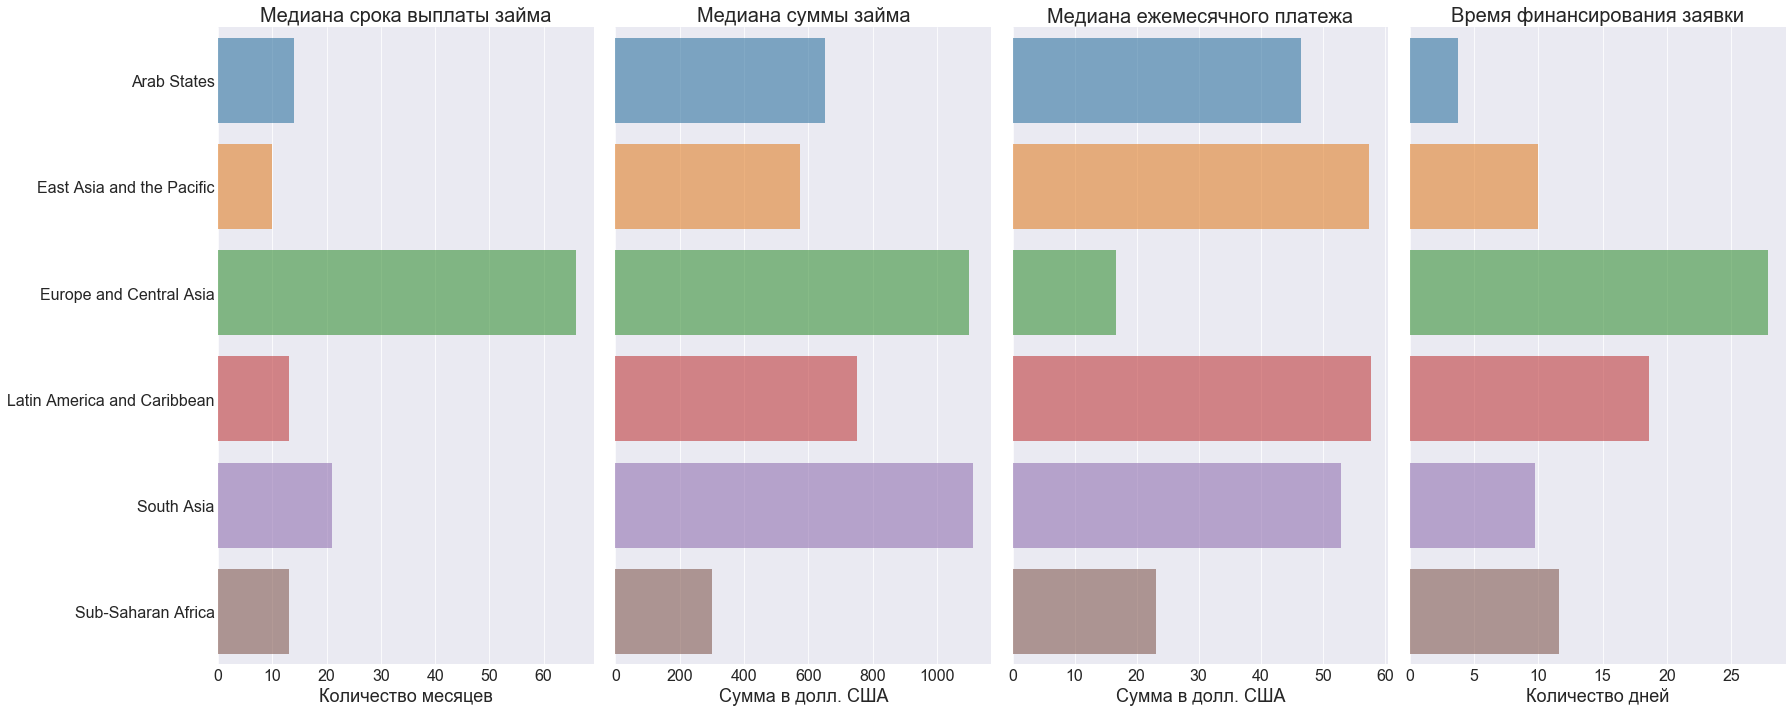

In [97]:
f,ax=plt.subplots(1, 4, sharey=True, figsize=(25,10))

sns.barplot(y='world_region', x='term_in_months', data=df_region_median, alpha=0.6, ax=ax[0])
ax[0].set_title("Медиана срока выплаты займа", fontsize=20)
ax[0].set_xlabel('Количество месяцев', fontsize=18)
ax[0].set_ylabel(None)
ax[0].tick_params(labelsize=16)

sns.barplot(y='world_region', x='loan_amount', data=df_region_median, alpha=0.6, ax=ax[1])
ax[1].set_title("Медиана суммы займа", fontsize=20)
ax[1].set_xlabel('Сумма в долл. США', fontsize=18)
ax[1].set_ylabel(None)
ax[1].tick_params(labelsize=16)

sns.barplot(y='world_region', x='monthly_repayment', data=df_region_median, alpha=0.6, ax=ax[2])
ax[2].set_title("Медиана ежемесячного платежа", fontsize=20)
ax[2].set_xlabel('Сумма в долл. США', fontsize=18)
ax[2].set_ylabel(None)
ax[2].tick_params(labelsize=16)

sns.barplot(y='world_region', x='time_funding', data=df_region_median, alpha=0.6, ax=ax[3])
ax[3].set_title("Время финансирования заявки", fontsize=20)
ax[3].set_xlabel('Количество дней', fontsize=18)
ax[3].set_ylabel(None)
ax[3].tick_params(labelsize=16)

plt.tight_layout()
plt.show()

В Арабских странах самое маленькое время финансирования заявки, медианное значение состоявляет менее 5 дней, при том что медиана суммы займов является средней. 

Медиана срока выплат займов является схожей практически во всех регионах и обычно составляет менее 20 месяцев. Исключением является Европа и Центральная Азия, где медиана срока выплат займа составляет более 60 месяцев. Суммы займов там одни из самых больших, а также крайне высокое время финансрования заявки. Сообщество Кива должно обратить на это внимание, так как в странах Южной Азии со схожей медианой сумм займов финансирование заявки происходит в 2,5 раза быстрее. 

Также следует отметить долгое финансирование суммы заявки в Латинской Америке - 20 дней, при том, что медиана суммы займа меньше, чем в Южной Азии. 

Южная Азия выглядит наиболее успешным регионом для Kiva, так как там достаточно быстрое время финансирование заявки высокая медиана суммы займов и небольшая медиана сроков выплаты займа. Также перспективными странами являются представители Арабского региона и Восточной Азии и Океании, там также наблюдается быстрое финансирование займов при средних суммах займов, хотя медиана суммы в таких странах ниже в два раза, чем в Южной Азии. 

Сообщество Kiva должно обратить внимание в первую очередь на страны Латинской Америки, Европы и Центральной Азии в связи с большим количеством времени финансирования заявки. Также не стоит забывать и о Африканских странах, в которых при самой низкой медиане суммы займов достаточно высокое время финансрования заявок.